In [14]:
import pickle

simArchive = pickle.load(open( "/Users/clisle/Dropbox/dataScience/parksim/parksim_records.p", "rb" ) )
visitors = simArchive['guests']
venues = simArchive['attractions']

print('there were %5d guests' % len(visitors))
print('there were %5d venues to visit' % len(venues))
print()
print('Venue Names and types:')
print('----------------------')
for i in venues:
    print(venues[i]['name'],venues[i]['type'])

there were  3984 guests
there were    15 venues to visit

Venue Names and types:
----------------------
Walt Disney Railroad  ride
Harmony Barber Shop  service
Plaza Restaurant  restaurant
Crystal Palace  restaurant
Swiss Family Treehouse  ride
Magic Carpets of Aladdin  ride
Jungle Cruise  ride
Enchanted Tiki Room  ride
Pirates of the Caribbean  ride
Sunshine Tree Terrace  restaurant
Splash Mountain  ride
Big Thunder Mountain Railroad  ride
Haunted Mansion  ride
Hall of Presidents  ride
Space Mountain  ride


In [17]:
import pandas as pd

vizdata = []
for event in venues['Space Mountain']['events']:
    #print(event)
    vizdata.append({'type':event[0],'time':event[1],'queuelength':event[2]})
space_mountain_events = pd.DataFrame(vizdata)

Oh no, it looks like the queue length was longer than 1160 visitors multiple times during the day:

In [32]:
space_mountain_events[space_mountain_events.queuelength> 1160]

,queuelength,time,type
1925,1161,67.077091,release
1927,1161,67.277391,request
1928,1162,67.285076,request
1929,1163,67.529645,request
1930,1163,67.596852,release
1931,1163,67.622806,release
1932,1161,67.640502,release
1933,1161,67.685254,request
1934,1162,67.739899,request
1935,1163,67.757354,request


It is easier to see the results graphically, so lets count up the times that the queue reached length 900 and bin this according to the time of the day to see how the flow changed throughout the day

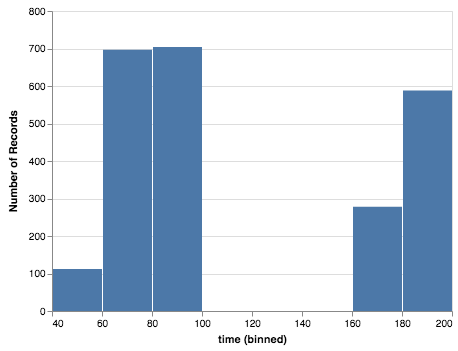

In [27]:
import altair as alt
from vega_datasets import data

data = space_mountain_events[space_mountain_events.queuelength> 900]

alt.Chart(data).mark_bar().encode(
    alt.X("time:Q", bin=True),
    y='count()',
)

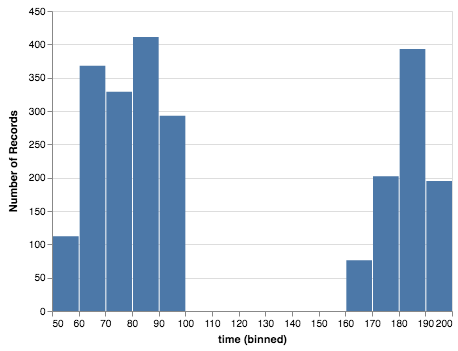

In [33]:
# so there was a peak in the beginning of the day and the end of the day.  Pass a bin() object to 
# have finer control over the number of bins

alt.Chart(data).mark_bar().encode(
    alt.X("time:Q", bin=alt.Bin(maxbins=25)),
    y='count()',
)
